In [3]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew

In [4]:
df=pd.read_csv('DS1_C4_S5_Students_Scores_Data_Practice.csv')

In [3]:
df

,Name,Statistics,Python,Tableau
0,David,62,89,56
1,James,47,87,86
2,Robert,55,67,77
3,Thomas,74,55,45
4,Steven,31,47,73
5,Paul,77,72,62
6,Gary,85,76,74
7,Justin,63,79,89
8,Patrick,42,44,67
9,Tyler,32,99,67


# task 1

In [4]:
x=df[['Statistics','Python','Tableau']]
x

,Statistics,Python,Tableau
0,62,89,56
1,47,87,86
2,55,67,77
3,74,55,45
4,31,47,73
5,77,72,62
6,85,76,74
7,63,79,89
8,42,44,67
9,32,99,67


In [6]:
Mean=[]
Median=[]
Mode=[]
for i in x.columns:
    Mean.append(st.mean(x.loc[:,i]))
    Median.append(st.median(x.loc[:,i]))
    Mode.append(st.mode(x.loc[:,i]))
a=pd.DataFrame([Mean,Median,Mode],columns=['Statistics','Python','Tableau'])
a.insert(0,column='Measure',value=['Mean','Medain','Mode'])

In [7]:
a

,Measure,Statistics,Python,Tableau
0,Mean,58.5,73.583333,71.75
1,Medain,62.5,74.000000,70.50
2,Mode,63.0,99.000000,67.00


In [ ]:
# conclusion:- students are doing good in python.

# task 2

In [9]:
y=df[['Statistics','Python','Tableau']]

In [10]:
mean=[]
std=[]
cv=[]
for i in y.columns:
    mean.append(st.mean(y.loc[:,i]))
    std.append(st.stdev(y.loc[:,i])/st.mean(y.loc[:,i]))
    cv.append(st.stdev(y.loc[:,i])/st.mean(y.loc[:,i])*100)
y=pd.DataFrame([mean,std,cv],columns=['Statistics','Python','Tableau'])
y.insert(0,column='measure',value=['mean','std','cv'])
y        


,measure,Statistics,Python,Tableau
0,mean,58.500000,73.583333,71.750000
1,std,0.299156,0.250552,0.201105
2,cv,29.915640,25.055155,20.110515


In [ ]:
# conclusion:- All students are performed best.

# task 3

In [5]:
n=df[['Statistics','Python','Tableau']]
n

,Statistics,Python,Tableau
0,62,89,56
1,47,87,86
2,55,67,77
3,74,55,45
4,31,47,73
5,77,72,62
6,85,76,74
7,63,79,89
8,42,44,67
9,32,99,67


In [6]:
for col in n.columns:
    Max=max(n[col])
    Min=min(n[col])
    Range=Max-Min
    Q1=n[col].quantile(0.25)
    Q3=n[col].quantile(0.75)
    IQR=Q3-Q1
    LF=Q1-1.5*IQR
    UF=Q3+1.5*IQR
    LO=[]
    UO=[]
    for i in n[col]:
        if i<LF:
            LO.append(i)
        if i>UF:
            UO.append(i)
    if col=='Statistics':
        statistics=[Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
    elif col=='Python':
        python=[Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
    else:
        Tableau=[Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
        
        

In [7]:
m=pd.DataFrame()
m['Measure']=['Max','Min','Range','Q1','Q3','IQR','LF','UF','Outliers']
m['Statistics']=statistics
m['Python']=python
m['Tableau']=Tableau
m

,Measure,Statistics,Python,Tableau
0,Max,31,44,45
1,Min,85,99,97
2,Range,54,55,52
3,Q1,45.75,64.0,65.75
4,Q3,71.75,87.5,79.25
5,IQR,26.0,23.5,13.5
6,LF,6.75,28.75,45.5
7,UF,110.75,122.75,99.5
8,Outliers,"[[], []]","[[], []]","[[45], []]"


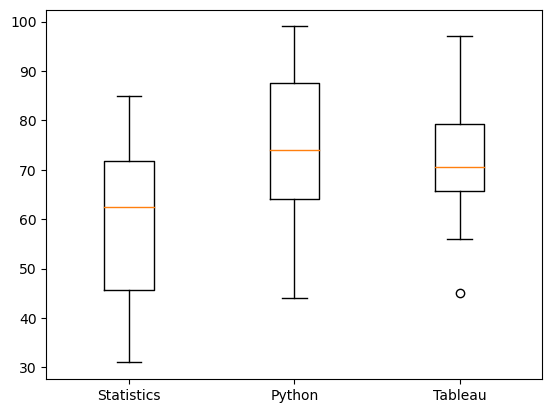

In [111]:
# method 2
plt.boxplot([n['Statistics'],n['Python'],n['Tableau']],labels=['Statistics','Python','Tableau'])
plt.show()

In [ ]:
# conclusion:- according to the boxplot tableau is skewed than the others.

In [116]:
from scipy.stats import skew                # negative skew
round(skew(n['Statistics']),2)

-0.26

In [117]:
from scipy.stats import skew              # negative skew
round(skew(n['Python']),2)

-0.19

In [118]:
from scipy.stats import skew         # zero skew          
round(skew(n['Tableau']),2)

0.0

In [ ]:
# Tableau score is skewed more than the other outliers

In [ ]:
# Tableau

# task 4

<AxesSubplot:xlabel='Statistics', ylabel='Count'>

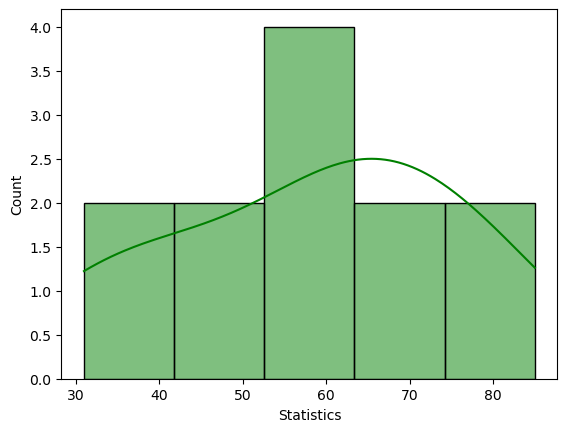

In [78]:
sb.histplot(n['Statistics'],kde=True,color='g')

In [86]:
from scipy.stats import skew                # negative skew
round(skew(n['Statistics']),2)

-0.26

In [ ]:
# conclusion:- Statistics shows left skew.

<AxesSubplot:xlabel='Python', ylabel='Count'>

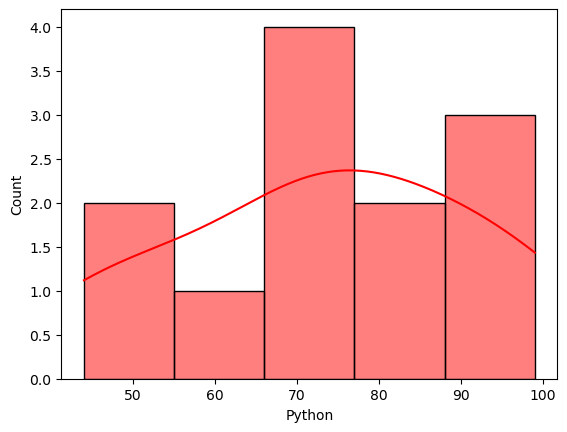

In [85]:
sb.histplot(n['Python'],kde=True,color='red')

In [88]:
from scipy.stats import skew              # negative skew
round(skew(n['Python']),2)

-0.19

In [ ]:
# conclusion:- python shows left skew.

<AxesSubplot:xlabel='Tableau', ylabel='Count'>

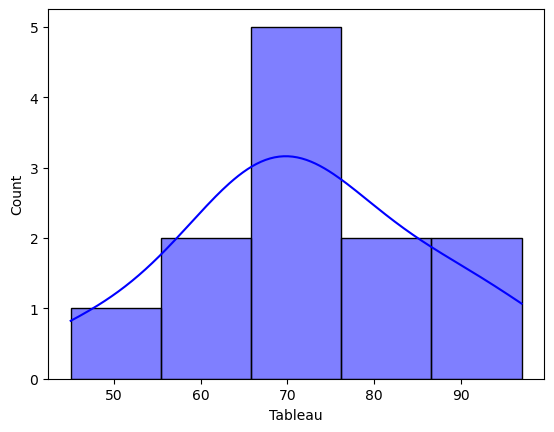

In [83]:
sb.histplot(n['Tableau'],kde=True,color='blue')

In [89]:
from scipy.stats import skew         # zero skew          
round(skew(n['Tableau']),2) 

0.0

In [ ]:
# conclusion:-Tableau shows normal distrubution.

# task 5

In [97]:
from scipy.stats import kurtosis
round(kurtosis(n['Statistics'],fisher=False),2)

1.96

<AxesSubplot:xlabel='Statistics', ylabel='Density'>

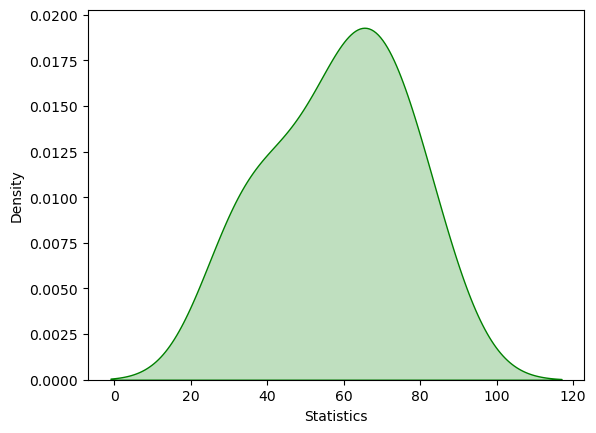

In [112]:
sb.kdeplot(n['Statistics'],shade=True,color='g')

In [99]:
round(kurtosis(n['Python'],fisher=False),2)

1.98

<AxesSubplot:xlabel='Python', ylabel='Density'>

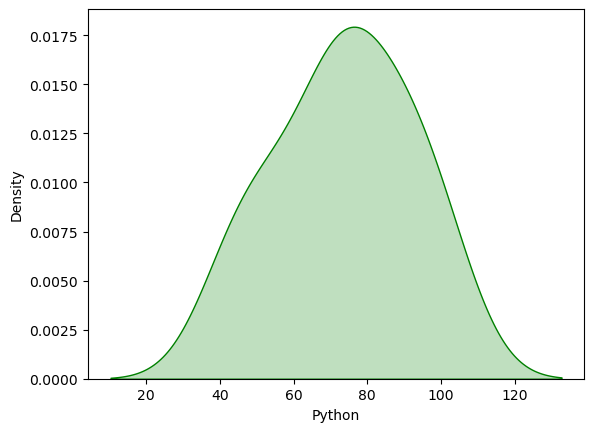

In [113]:
sb.kdeplot(n['Python'],shade=True,color='g')

In [104]:
round(kurtosis(n['Tableau'],fisher=False),2)

2.56

<AxesSubplot:xlabel='Tableau', ylabel='Density'>

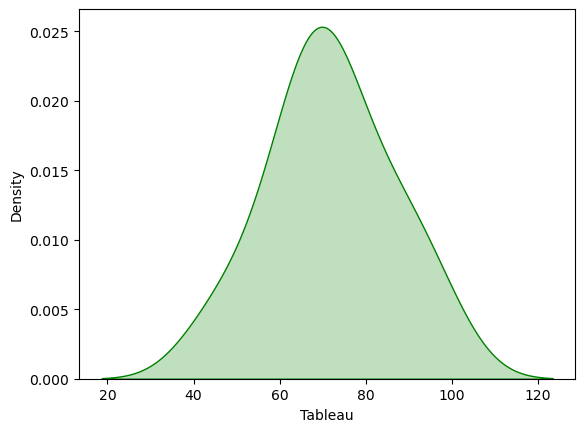

In [115]:
sb.kdeplot(n['Tableau'],shade=True,color='g')

In [ ]:
# conclusion:- Statistics,python are mesokurtic and tableau is leptokurtic.